In [4]:
!pip install matplotlib numpy scipy pandas jupyter notebook

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]], shape=(4770, 2))}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


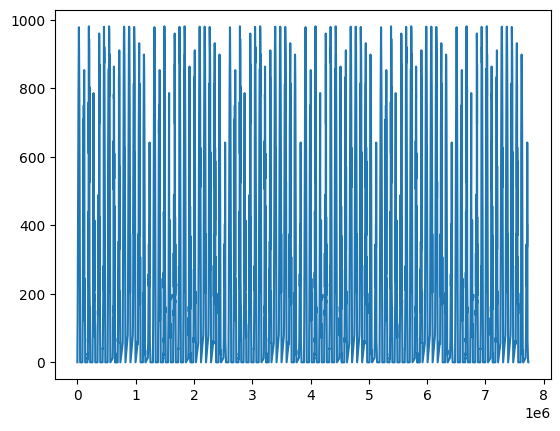

In [6]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
fig, ax = plt.subplots()
ax.plot(timestamp, irradiance)

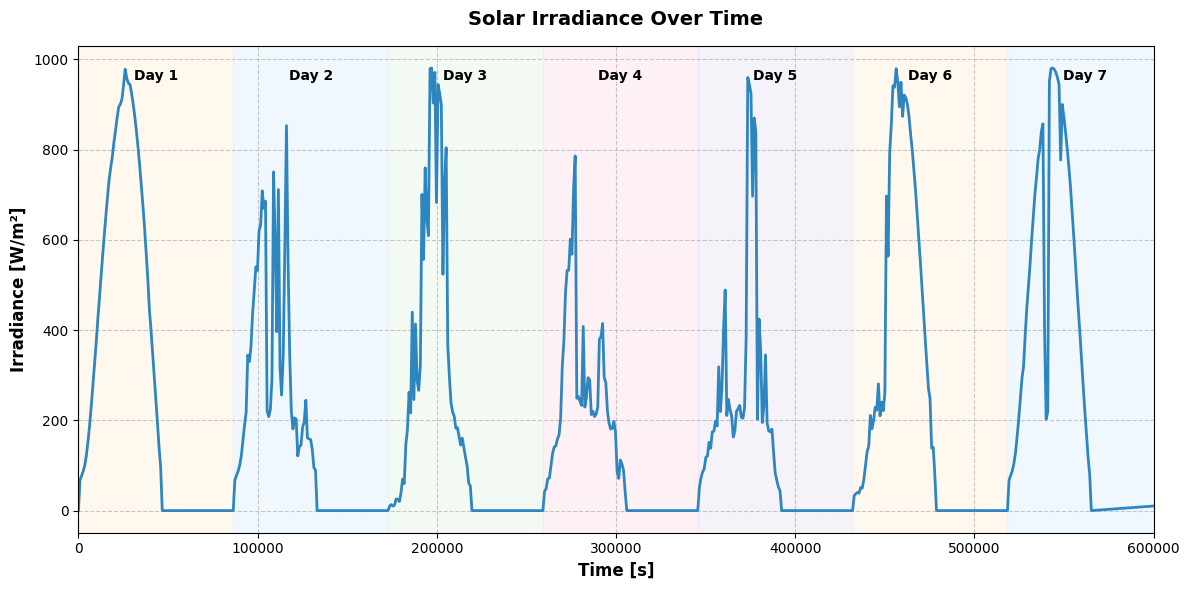

In [7]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

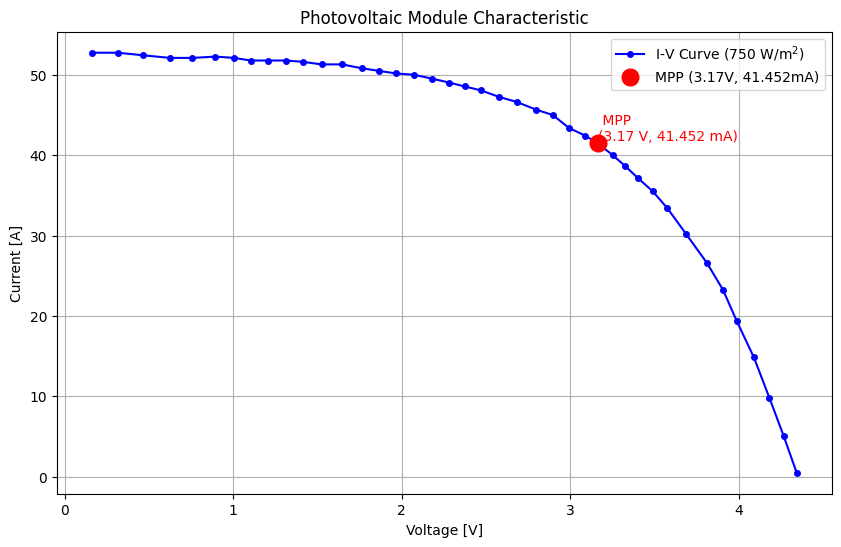

Irradiance: 750 W/m^2
MPP Voltage: 3.1657 V
MPP Current: 41.4516 mA
Max Power: 131.2213


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 设置配置
filename = './samples/750w.txt'  # 你的文件路径
g = 750                          # 对应的光照强度

# 2. 读取数据
try:
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    voltage_raw = data[:, 0]
    current_raw = data[:, 1]
except Exception as e:
    # 如果找不到文件，这里生成一些模拟数据方便演示代码效果
    print(f"警告: 没找到文件 {filename}，使用模拟数据演示。")
    voltage_raw = np.array([0.5, 3.0, 1.0, 3.2, 1.5, 3.4, 2.0, 0.0, 2.5, 2.8, 3.5])
    current_raw = np.array([0.03, 0.024, 0.03, 0.015, 0.03, 0.005, 0.029, 0.03, 0.028, 0.026, 0.0])

# 3. 排序 (解决曲线乱跑的问题)
sort_indices = np.argsort(voltage_raw)
x_sorted = voltage_raw[sort_indices]
y_sorted = current_raw[sort_indices]

# 4. 计算 MPP
power = x_sorted * y_sorted
max_idx = np.argmax(power) # 找到最大功率的索引

v_mpp = x_sorted[max_idx]
i_mpp = y_sorted[max_idx]
max_p = power[max_idx]

# ================= 绘图部分 =================
plt.figure(figsize=(10, 6))

# 第一步：画蓝色的曲线
# 'b-o' 意思是 blue(蓝色) line(-) with circle marker(o)
plt.plot(x_sorted, y_sorted, 'b-o', label=f'I-V Curve ({g} W/m$^2$)', markersize=4)

# 第二步：画红色的 MPP 点
# 'ro' 意思是 red(红色) circle(圆点)
# markersize=10 把点画大一点，显眼
plt.plot(v_mpp, i_mpp, 'ro', markersize=12, label=f'MPP ({v_mpp:.2f}V, {i_mpp:.3f}mA)')
# 标注 MPP 点
plt.text(v_mpp, i_mpp, f' MPP\n({v_mpp:.2f} V, {i_mpp:.3f} mA)', 
         fontsize=10, color='red', verticalalignment='bottom')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.title(f'Photovoltaic Module Characteristic')
plt.legend()
plt.grid(True)
plt.show()

# ================= 打印结果 =================
print(f"Irradiance: {g} W/m^2")
print(f"MPP Voltage: {v_mpp:.4f} V")
print(f"MPP Current: {i_mpp:.4f} mA")
print(f"Max Power: {power.max():.4f}")

# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

=== Copy these lines to inc/config_converter_pv.h ===

#define SIZE_CONV_PV 24
static const double V_CONV_PV[SIZE_CONV_PV] = { 0.6459, 0.6773, 0.7864, 0.8749, 1.0136, 1.1997, 1.5119, 1.7951, 1.9824, 2.2697, 2.5861, 2.6361, 2.6819, 2.7277, 2.7569, 2.7860, 2.9937, 3.2765, 3.4801, 3.6527, 3.8761, 4.1871, 4.6905, 4.9790 };
static const double ETA_CONV_PV[SIZE_CONV_PV] = { 64.6824, 67.1739, 71.6304, 76.4808, 80.6522, 83.8485, 85.0931, 85.8398, 85.8896, 88.1298, 90.3700, 85.5909, 80.6127, 75.5847, 71.3532, 68.4161, 68.6417, 67.3568, 65.4633, 63.1640, 60.7971, 56.9086, 51.3971, 47.6439 };

正在生成预览图...


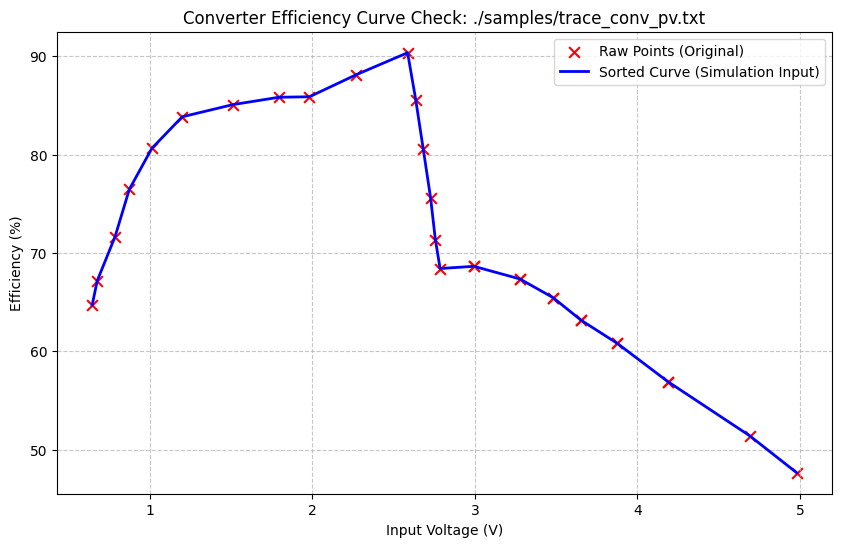

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # <--- 新增：引入绘图库

# --- 配置区域 ---
# 假设你的文件名为 'trace_conv_pv.txt'
FILE_NAME = './samples/trace_conv_pv.txt' 

try:
    # 1. 读取数据
    # header=None 如果文件没有标题行 (第一行就是数据)
    # header=0 如果文件第一行是标题 (x, y)
    # 这里假设你的文件像之前一样有标题 "x, y"
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
    # 去除列名空格并重命名
    df.columns = [c.strip() for c in df.columns] 
    df.columns = ['V', 'Eta']

    # 2. 数据清洗
    # SystemC 要求输入 (X轴) 必须严格单调递增，所以必须排序
    df_sorted = df.sort_values(by='V')
    
    # 去除完全重复的行
    df_sorted = df_sorted.drop_duplicates()
    
    # 重置索引 (可选，方便调试)
    df_sorted = df_sorted.reset_index(drop=True)

    # 3. 生成 C++ 代码
    v_array = df_sorted['V'].values
    eta_array = df_sorted['Eta'].values
    size = len(v_array)

    print("=== Copy these lines to inc/config_converter_pv.h ===\n")
    print(f"#define SIZE_CONV_PV {size}")
    
    # 格式化输出，保留4位小数
    v_str = ", ".join([f"{x:.4f}" for x in v_array])
    print(f"static const double V_CONV_PV[SIZE_CONV_PV] = {{ {v_str} }};")
    
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_PV[SIZE_CONV_PV] = {{ {eta_str} }};")
    print("\n==================================================")

    # 4. 可视化绘图 (新增功能)
    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    
    # 绘制原始数据点 (用红色散点表示，检查是否有离群点)
    # 如果原始数据很乱，这里的红点会散落在蓝线周围
    plt.scatter(df['V'], df['Eta'], color='red', marker='x', s=60, label='Raw Points (Original)')
    
    # 绘制处理后的曲线 (用蓝色实线表示，这是仿真器实际“看到”的曲线)
    plt.plot(df_sorted['V'], df_sorted['Eta'], color='blue', linewidth=2, label='Sorted Curve (Simulation Input)')
    
    plt.title(f'Converter Efficiency Curve Check: {FILE_NAME}')
    plt.xlabel('Input Voltage (V)')
    plt.ylabel('Efficiency (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 显示图表
    plt.show()
    
except FileNotFoundError:
    print(f"错误: 找不到文件 {FILE_NAME}，请确保文件已上传且路径正确。")
except Exception as e:
    print(f"发生错误: {e}")

![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

=== Copy these lines to inc/config_converter_battery.h ===

#define SIZE_CONV_BATT 26
static const double I_CONV_BATT[SIZE_CONV_BATT] = { 0.0138, 0.0172, 0.0214, 0.0268, 0.0322, 0.0388, 0.0486, 0.0633, 0.0797, 0.1046, 0.1311, 0.1753, 0.2515, 0.3778, 0.6282, 1.0561, 1.8965, 3.1883, 5.0594, 9.0111, 15.9172, 27.8855, 50.4911, 89.1882, 142.7007, 262.6783 };
static const double ETA_CONV_BATT[SIZE_CONV_BATT] = { 31.5284, 37.0693, 41.8691, 46.8652, 51.2800, 55.1146, 59.6769, 64.2934, 68.5081, 73.1237, 76.9252, 80.3274, 83.4401, 85.6721, 87.9281, 89.3758, 90.2445, 90.6064, 90.8959, 91.3303, 91.4750, 91.4750, 91.3303, 91.4750, 92.4161, 93.6467 };

正在生成预览图...


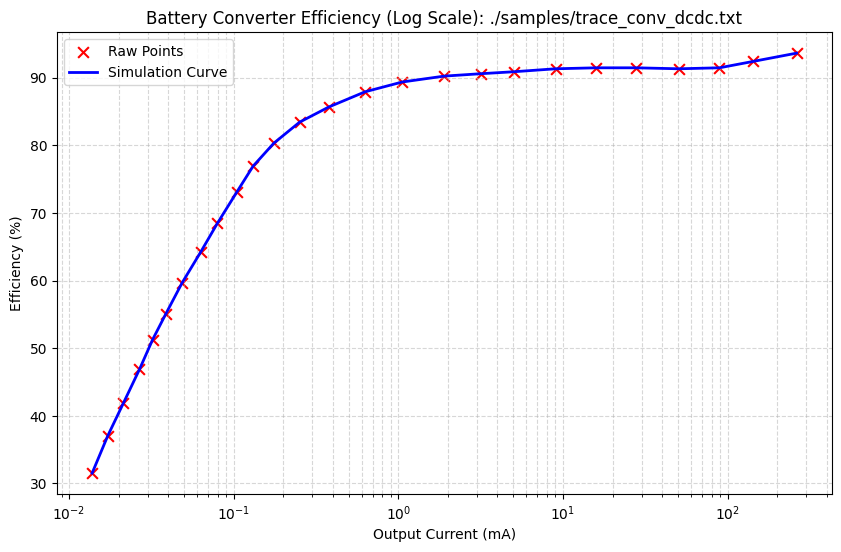

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # <--- 引入绘图库

# --- 配置区域 ---
# 把这里改成你的电池转换器数据文件名 (记得保存为 csv/txt)
FILE_NAME = './samples/trace_conv_dcdc.txt' 

try:
    # 1. 读取数据 (假设格式还是 x, y)
    df = pd.read_csv(FILE_NAME, delimiter=',')
    
    # 去除列名空格
    df.columns = [c.strip() for c in df.columns] 
    
    # 重命名列: Battery 的 X 是 Current (I), Y 是 Efficiency (Eta)
    df.columns = ['I', 'Eta']

    # 2. 数据清洗
    # 按电流 (I) 排序 - SystemC 必须要求单调递增
    df_sorted = df.sort_values(by='I')
    
    # 去重
    df_sorted = df_sorted.drop_duplicates()
    
    # 重置索引
    df_sorted = df_sorted.reset_index(drop=True)

    # 3. 生成 C++ 代码 (注意变量名变化)
    i_array = df_sorted['I'].values
    eta_array = df_sorted['Eta'].values
    size = len(i_array)

    print("=== Copy these lines to inc/config_converter_battery.h ===\n")
    
    # 修改点 1: 宏定义名称
    print(f"#define SIZE_CONV_BATT {size}")
    
    # 修改点 2: 电流数组 I_CONV_BATT
    # 注意: 确认你的 txt 里 X 轴数据的单位是 mA。如果是 A，这里需要 * 1000
    i_str = ", ".join([f"{x:.4f}" for x in i_array])
    print(f"static const double I_CONV_BATT[SIZE_CONV_BATT] = {{ {i_str} }};")
    
    # 修改点 3: 效率数组 ETA_CONV_BATT
    eta_str = ", ".join([f"{x:.4f}" for x in eta_array])
    print(f"static const double ETA_CONV_BATT[SIZE_CONV_BATT] = {{ {eta_str} }};")

    print("\n========================================================")

    # --- 4. 可视化绘图区域 (新增) ---
    print("正在生成预览图...")
    plt.figure(figsize=(10, 6))
    
    # A. 绘制原始散点 (红叉)
    plt.scatter(df['I'], df['Eta'], color='red', marker='x', s=60, label='Raw Points')
    
    # B. 绘制排序后的曲线 (蓝线)
    plt.plot(df_sorted['I'], df_sorted['Eta'], color='blue', linewidth=2, label='Simulation Curve')
    
    # C. 设置对数坐标 (关键!)
    # 因为电池电流跨度大 (0.01mA 到 100mA)，用对数坐标看才清楚
    plt.xscale('log') 
    
    plt.title(f'Battery Converter Efficiency (Log Scale): {FILE_NAME}')
    plt.xlabel('Output Current (mA)')
    plt.ylabel('Efficiency (%)')
    plt.grid(True, which="both", linestyle='--', alpha=0.5) # grid both 对应对数网格
    plt.legend()
    
    plt.show()
    
except FileNotFoundError:
    print(f"错误: 找不到文件 {FILE_NAME}")
except Exception as e:
    print(f"发生错误: {e}")

# Battery model

![](datasheet/Battery/datasheet.jpg)

In [11]:
from scipy.interpolate import interp1d

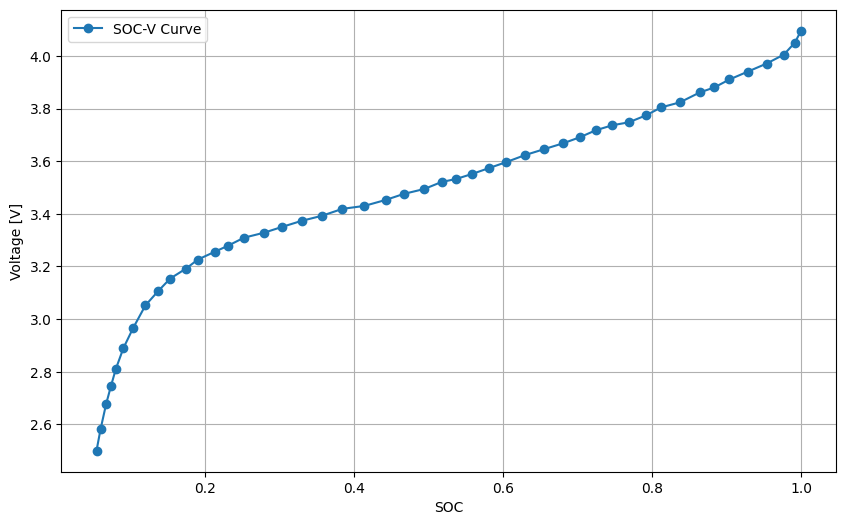

In [21]:
# Extract digitalized points
data = np.loadtxt('./samples/0.5c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


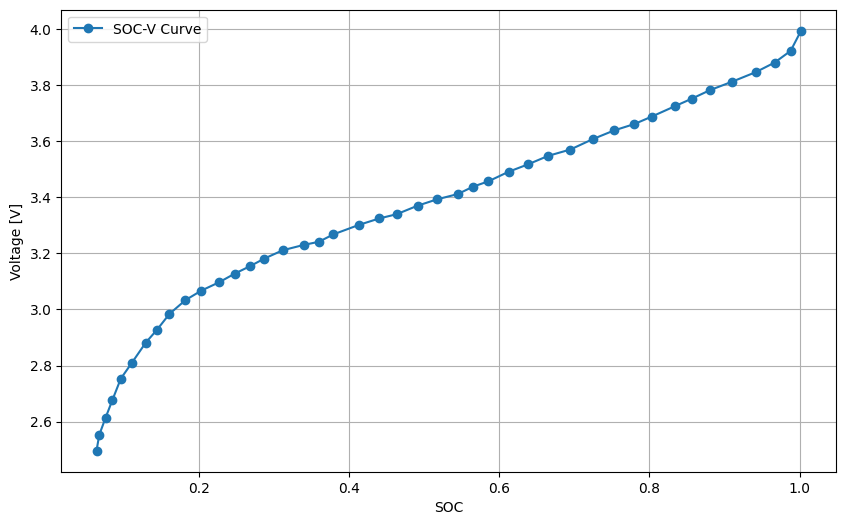

In [22]:
# Do the same for another curve
# TODO
# Extract digitalized points
data = np.loadtxt('./samples/1c.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


### How to use `curve_fit`

In [25]:
from scipy.optimize import curve_fit

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# 1. 加载数据
data_1c = np.loadtxt('./samples/1c.txt', delimiter=',') 
data_05c = np.loadtxt('./samples/0.5c.txt', delimiter=',')
# 2. 提取 SOC 和 电压 列
soc_1c = data_1c[:, 0]
v_1c = data_1c[:, 1]
soc_05c = data_05c[:, 0]
v_05c = data_05c[:, 1]


In [ ]:
#same x axis
soc_common = np.linspace(0, 1, 100)
f_v1c = interp1d(soc_1c, v_1c, fill_value="extrapolate")
f_v05c = interp1d(soc_05c, v_05c, fill_value="extrapolate")

v_1c_new = f_v1c(soc_common)
v_05c_new = f_v05c(soc_common)

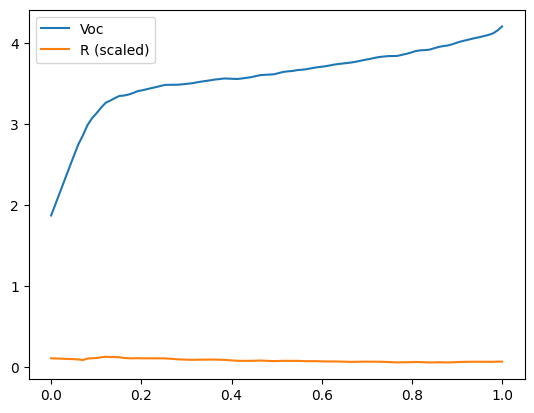

In [ ]:
I_1C = 3200.0   # mA
I_05C = 1600.0  # mA

r_series = (v_05c_new - v_1c_new) / (I_1C - I_05C)

# 计算 Voc
v_open_circuit = v_1c_new + I_1C * r_series

# 看看图，确保形状合理 (Voc 应该比放电电压高)
plt.plot(soc_common, v_open_circuit, label='Voc')
plt.plot(soc_common, r_series * 1000, label='R (scaled)') # R通常很小，放大看
plt.legend()
plt.show()

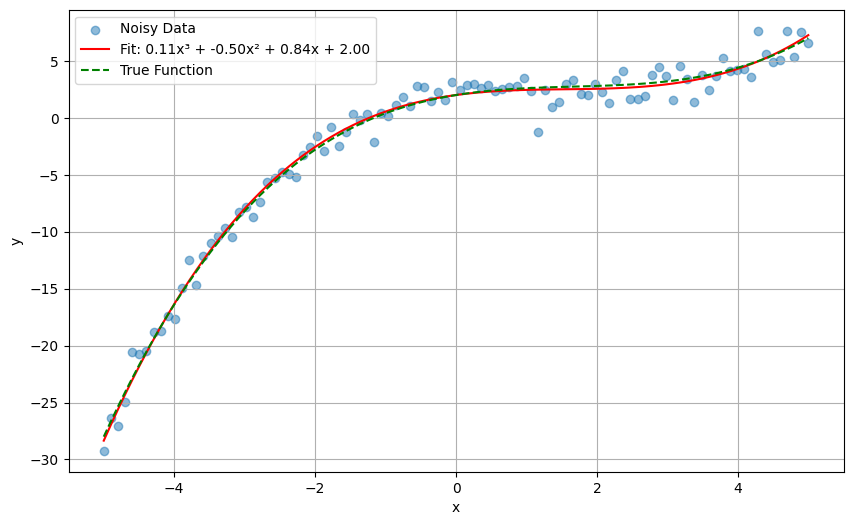

In [26]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate data
x_data = np.linspace(-5, 5, 100)
true_params = [0.1, -0.5, 1.0, 2.0]  # True coefficients
y_true = poly_func(x_data, *true_params)
noise = np.random.normal(0, 1, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define exponential decay function
def exp_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Generate data
x_data = np.linspace(0, 10, 100)
true_params = [10.0, 0.5, 1.0]  # [amplitude, decay rate, offset]
y_true = exp_decay(x_data, *true_params)
noise = np.random.normal(0, 0.5, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(exp_decay, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, exp_decay(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}*exp(-{popt[1]:.2f}x) + {popt[2]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Overfitting Example

In [ ]:
# Define high degree polynomial for overfitting
def complex_func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    return (a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + 
            a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9)

# Generate more points with higher noise
x_data = np.linspace(0, 10, 30)  # Increased to 30 points
true_params = [1.0, 0.5]
y_true = true_params[0] + true_params[1] * x_data
noise = np.random.normal(0, 0.5, len(x_data))  # Increased noise standard deviation to 0.5
y_data = y_true + noise

# Fit with overly complex function
initial_guess = np.ones(10)
popt, pcov = curve_fit(complex_func, x_data, y_data, p0=initial_guess)

# Generate smooth points for plotting
x_smooth = np.linspace(0, 10, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', s=50, alpha=0.6, label='Noisy Data')
plt.plot(x_smooth, complex_func(x_smooth, *popt), 'r-', 
         label='Overfitted (9th degree)')
plt.plot(x_smooth, true_params[0] + true_params[1]*x_smooth, 'g--',
         label='True Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Overfitting with Noisy Data')
plt.grid(True)
plt.show()

In [38]:
# Fit the data to obtain V_OC(SOC)
# TODO
# 定义你的多项式函数（例如 4 次多项式，比演示的 3 次稍微准一点）
def battery_poly_func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

# 1. 拟合 Voc
popt_voc, _ = curve_fit(battery_poly_func, soc_common, v_open_circuit)



C++ Voc Coeffs (a,b,c,d,e): [-18.64842845  44.69486002 -36.60037106  12.55851751   2.05464539]
C++ R Coeffs (a,b,c,d,e): [-0.00045524  0.00116024 -0.00091822  0.000177    0.00010329]


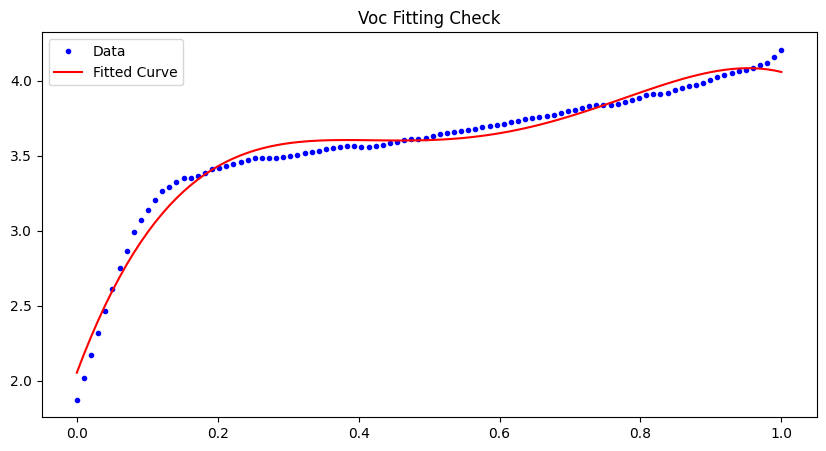

In [39]:
# Fit the data to obtain R(SOC)
# TODO
# 2. 拟合 R
popt_r, _ = curve_fit(battery_poly_func, soc_common, r_series)

# 打印结果供 C++ 使用
print("C++ Voc Coeffs (a,b,c,d,e):", popt_voc)
print("C++ R Coeffs (a,b,c,d,e):", popt_r)

# 画图验证一下
plt.figure(figsize=(10, 5))
plt.plot(soc_common, v_open_circuit, 'b.', label='Data')
plt.plot(soc_common, battery_poly_func(soc_common, *popt_voc), 'r-', label='Fitted Curve')
plt.title("Voc Fitting Check")
plt.legend()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 定义加载函数，处理空格分隔和表头
def load_simulation_data(filepath):
    # sep='\s+' 表示匹配任意数量的空格，engine='python' 更加稳定
    df = pd.read_csv(filepath, sep='\s+', engine='python')
    
    # 去掉表头中可能存在的 '%' 符号 (例如 %time -> time)
    df.columns = df.columns.str.replace('%', '')
    
    # 将时间转换为 '天' 或 '小时' 以便宏观观察
    df['day'] = df['time'] / 86400  # 86400秒 = 1天
    df['hour'] = df['time'] / 3600
    
    return df

# 2. 加载两个文件
# 请确保文件名与你实际生成的一致
df_serial = load_simulation_data('se_sim_trace.txt')
df_parallel = load_simulation_data('sim_trace.txt')

print("数据加载完成！")
print(f"串行数据时长: {df_serial['day'].max():.2f} 天")
print(f"并行数据时长: {df_parallel['day'].max():.2f} 天")

<>:7: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:7: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\lili\AppData\Local\Temp\ipykernel_1404\597610514.py:7: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv(filepath, sep='\s+', engine='python')


数据加载完成！
串行数据时长: 14.03 天
并行数据时长: 14.02 天


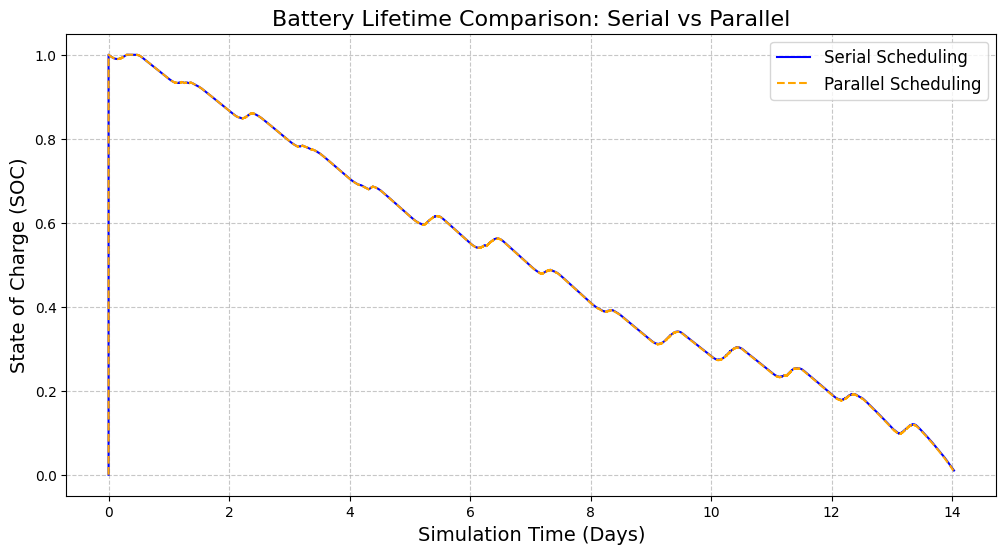

In [8]:
plt.figure(figsize=(12, 6))

# 绘制串行 SOC 曲线
plt.plot(df_serial['day'], df_serial['soc'], label='Serial Scheduling', color='blue', linewidth=1.5)

# 绘制并行 SOC 曲线
plt.plot(df_parallel['day'], df_parallel['soc'], label='Parallel Scheduling', color='orange', linestyle='--', linewidth=1.5)

plt.title('Battery Lifetime Comparison: Serial vs Parallel', fontsize=16)
plt.xlabel('Simulation Time (Days)', fontsize=14)
plt.ylabel('State of Charge (SOC)', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# 如果你的仿真跑了很久，soc 可能会掉到 0，这张图能直接看出谁活得久
plt.show()

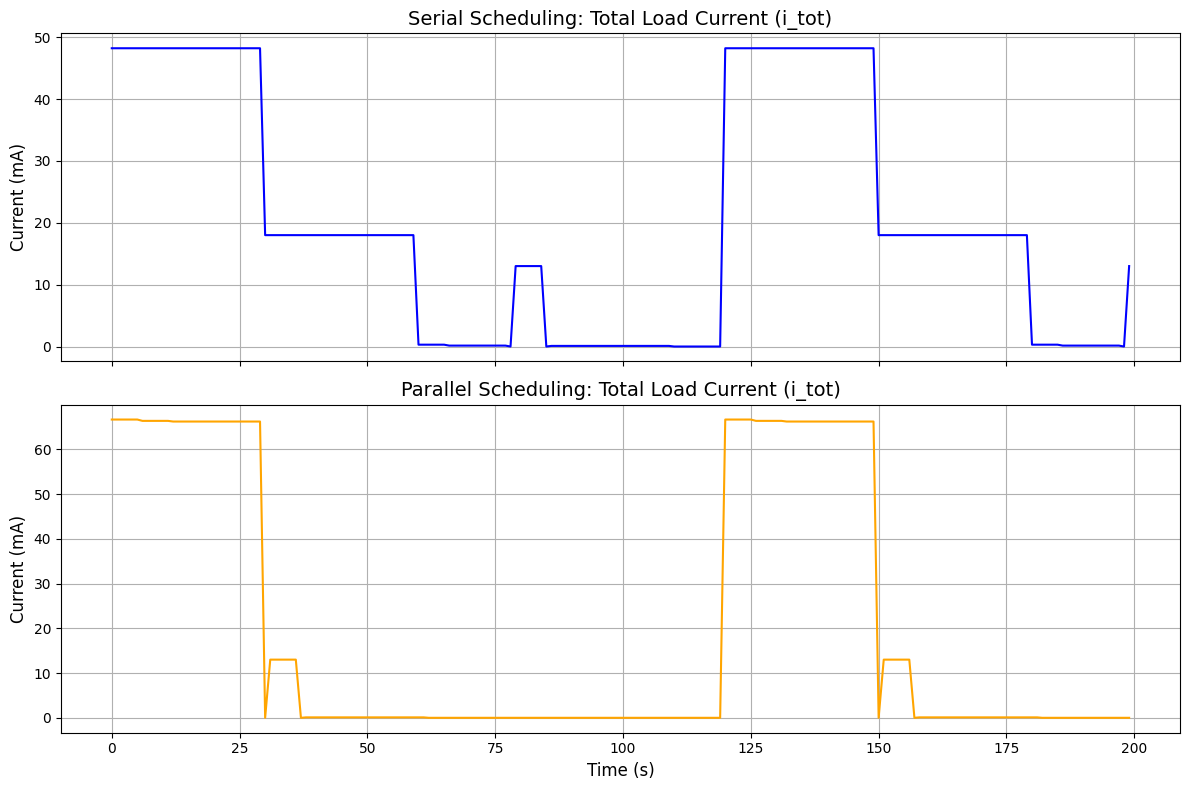

In [9]:
# 截取前 200 秒的数据
limit_sec = 200
subset_serial = df_serial[df_serial['time'] < limit_sec]
subset_parallel = df_parallel[df_parallel['time'] < limit_sec]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1. 串行电流图
ax1.plot(subset_serial['time'], subset_serial['i_tot'], color='blue')
ax1.set_title('Serial Scheduling: Total Load Current (i_tot)', fontsize=14)
ax1.set_ylabel('Current (mA)', fontsize=12)
ax1.grid(True)

# 2. 并行电流图
ax2.plot(subset_parallel['time'], subset_parallel['i_tot'], color='orange')
ax2.set_title('Parallel Scheduling: Total Load Current (i_tot)', fontsize=14)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Current (mA)', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

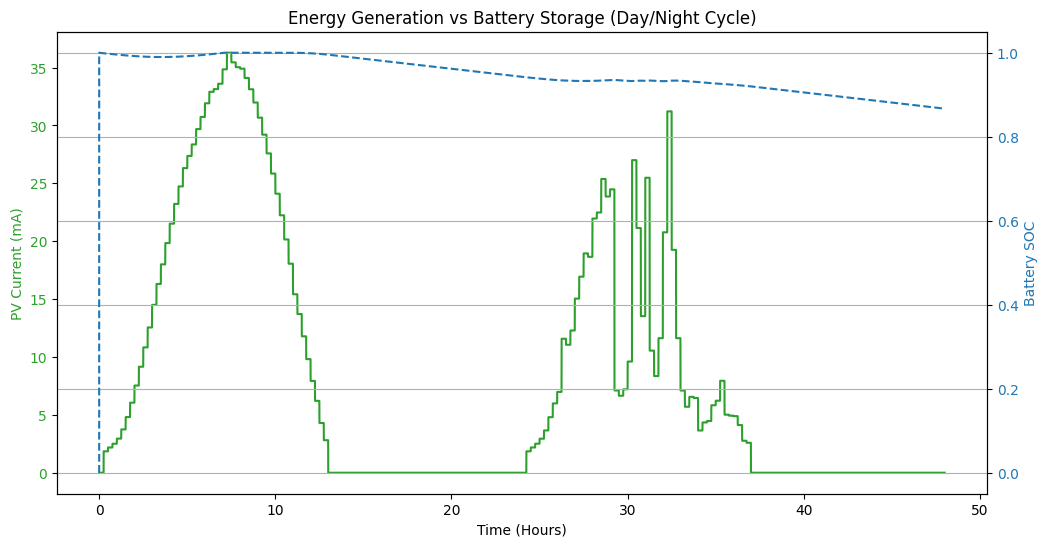

In [10]:
# 选择其中一天的数据 (例如第 2 天到第 3 天)
# 假设仿真时间足够长，如果不够长，就看前几万秒
start_time = 0
end_time = 86400 * 2 # 前两天

df_view = df_parallel[(df_parallel['time'] >= start_time) & (df_parallel['time'] <= end_time)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：画 PV 电流（代表发电）
color = 'tab:green'
ax1.set_xlabel('Time (Hours)')
ax1.set_ylabel('PV Current (mA)', color=color)
ax1.plot(df_view['time']/3600, df_view['real_i_pv'], color=color, label='PV Generation')
ax1.tick_params(axis='y', labelcolor=color)

# 右轴：画 SOC（代表储能状态）
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Battery SOC', color=color)  
ax2.plot(df_view['time']/3600, df_view['soc'], color=color, linestyle='--', label='Battery SOC')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Energy Generation vs Battery Storage (Day/Night Cycle)')
plt.grid(True)
plt.show()

绿线上升下降，但是在0以上的都是白天，0的是夜晚，白天波动的是光照强度变化+阴天

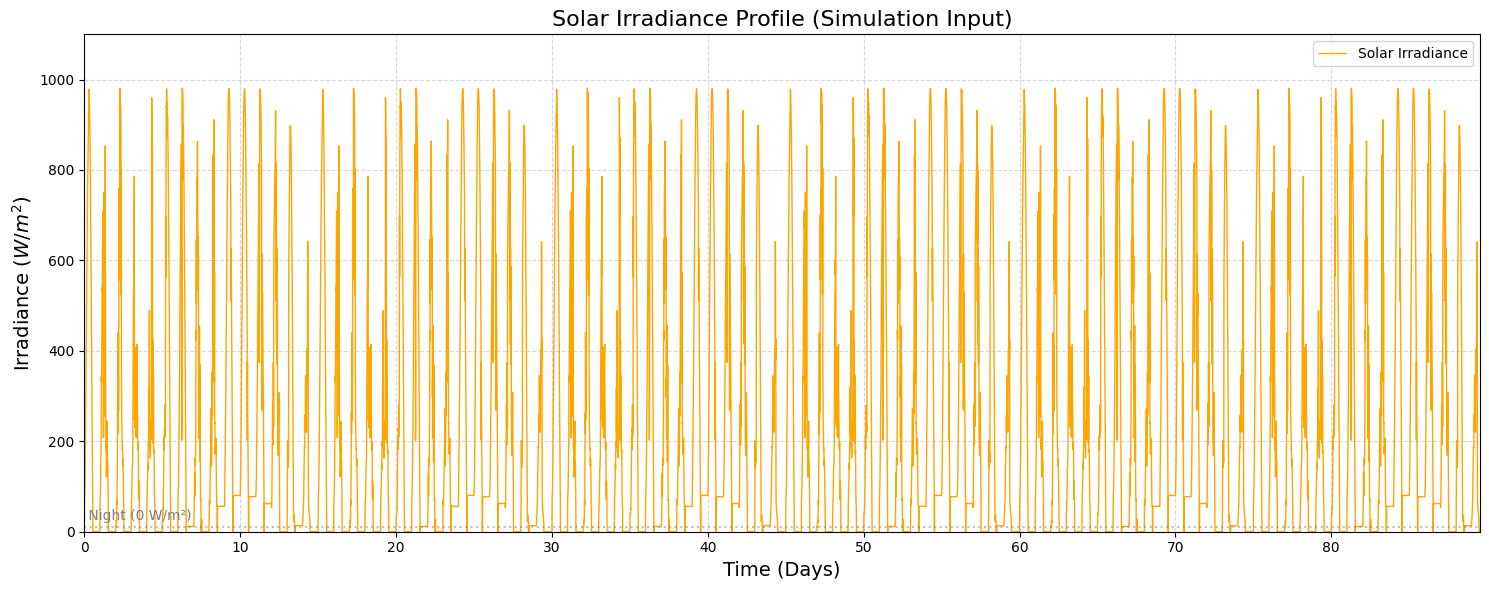

数据加载成功！
总时长: 89.54 天
数据点数: 8597


In [ ]:
#读取光照数据并绘图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================= 配置区域 =================
# 文件路径 (根据你的实际位置修改，如果放在同级目录就不用改)
FILE_PATH = './lab3-em4iot/simulator/input_files/gmonths.txt' 

# 仿真参数 (来自 config_pv.h)
TRACE_PERIOD = 900  # 采样间隔 900秒 (15分钟)
# ===========================================

def plot_solar_irradiance():
    try:
        # 1. 读取数据
        # gmonths.txt 只有一列数据，没有表头
        df = pd.read_csv(FILE_PATH, header=None, names=['Irradiance'])
        
        # 2. 生成时间轴
        # 数据点个数
        num_points = len(df)
        # 总秒数 = 点数 * 900秒
        total_seconds = num_points * TRACE_PERIOD
        
        # 创建一个从 0 开始，步长为 900 的时间序列
        time_seconds = np.arange(0, total_seconds, TRACE_PERIOD)
        
        # 为了方便阅读，将时间转换为 "天 (Days)"
        # 86400 秒 = 1 天
        df['Day'] = time_seconds / 86400
        
        # 3. 绘制图表
        plt.figure(figsize=(15, 6))
        
        # 绘制光照曲线
        plt.plot(df['Day'], df['Irradiance'], color='orange', linewidth=1, label='Solar Irradiance')
        
        # 添加装饰
        plt.title('Solar Irradiance Profile (Simulation Input)', fontsize=16)
        plt.xlabel('Time (Days)', fontsize=14)
        plt.ylabel('Irradiance ($W/m^2$)', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlim(0, df['Day'].max())  # 设置X轴范围
        plt.ylim(0, 1100)             # 设置Y轴范围 (通常最大约1000)
        
        # 添加图例
        plt.legend()
        
        # 4. 辅助分析：画一条线表示“有光/无光”界限
        plt.axhline(y=10, color='gray', linestyle=':', alpha=0.5)
        plt.text(0, 20, ' Night (0 W/m²)', color='gray', verticalalignment='bottom')

        plt.tight_layout()
        plt.show()

        print(f"数据加载成功！")
        print(f"总时长: {df['Day'].max():.2f} 天")
        print(f"数据点数: {num_points}")

    except FileNotFoundError:
        print(f"错误: 找不到文件 {FILE_PATH}，请确认路径是否正确。")

if __name__ == "__main__":
    plot_solar_irradiance()

<>:24: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:24: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\lili\AppData\Local\Temp\ipykernel_1404\3007398258.py:24: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df_sim = pd.read_csv(TRACE_FILE, sep='\s+', engine='python')


正在加载数据...


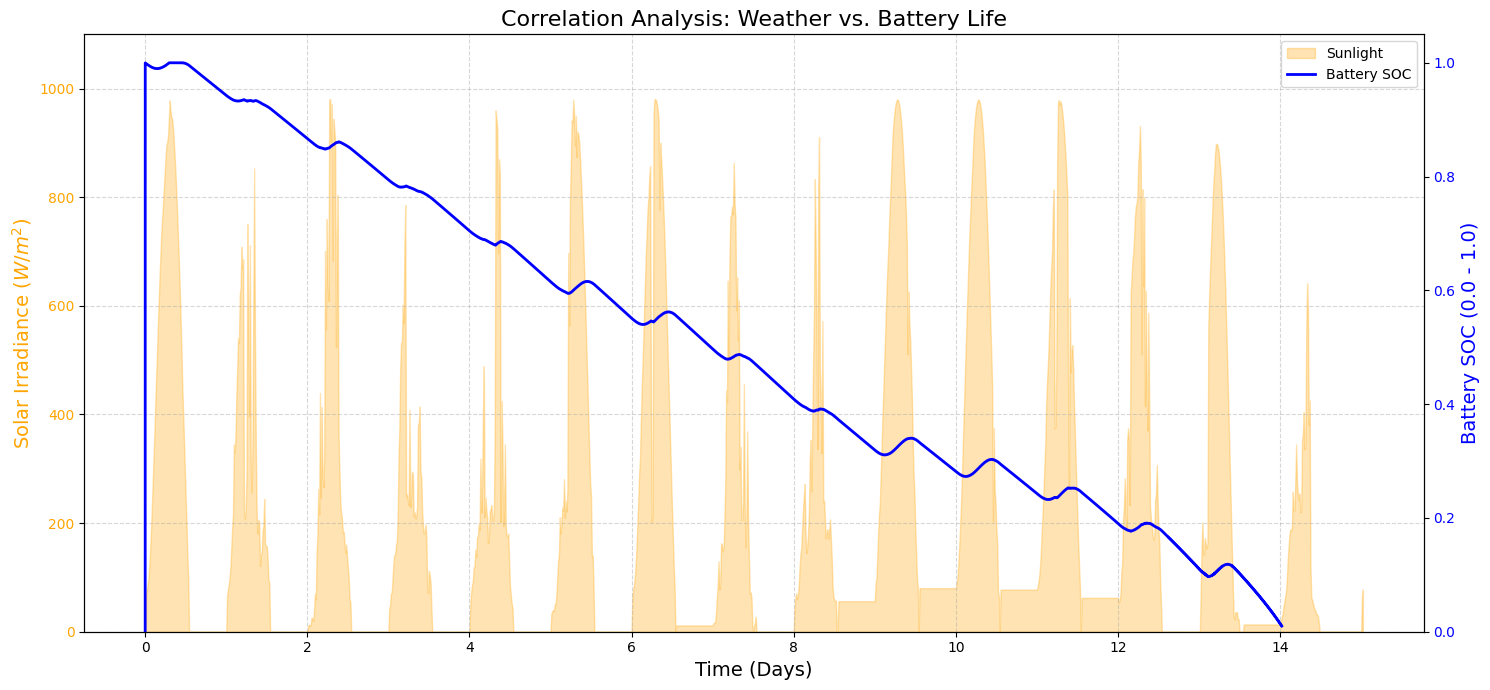

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================= 配置文件名 =================
WEATHER_FILE = './lab3-em4iot/simulator/input_files/gmonths.txt'       # 你的天气文件
TRACE_FILE = 'sim_trace.txt'       # 你的仿真输出文件 (比如 parallel_trace.txt)
# ===========================================

def plot_correlation():
    print("正在加载数据...")

    # --- 1. 处理天气数据 (gmonths.txt) ---
    # 只有一列光照数据，采样间隔 900秒
    df_weather = pd.read_csv(WEATHER_FILE, header=None, names=['Irradiance'])
    # 生成对应的时间轴
    weather_time_step = 900
    df_weather['time_sec'] = df_weather.index * weather_time_step
    df_weather['Day'] = df_weather['time_sec'] / 86400.0

    # --- 2. 处理仿真数据 (sim_trace.txt) ---
    # 假设第一列是 %time，需要处理一下表头
    try:
        df_sim = pd.read_csv(TRACE_FILE, sep='\s+', engine='python')
        # 清理列名中的 % 符号
        df_sim.columns = df_sim.columns.str.replace('%', '')
    except FileNotFoundError:
        print(f"错误：找不到文件 {TRACE_FILE}")
        return

    # 添加 'Day' 列
    df_sim['Day'] = df_sim['time'] / 86400.0

    # 为了让绘图更快，如果数据量太大，我们每隔 60 个点采一个样 (相当于每分钟一个点)
    # 这不会影响宏观趋势的观察
    if len(df_sim) > 100000:
        df_sim_plot = df_sim.iloc[::60, :]
    else:
        df_sim_plot = df_sim

    # --- 3. 截取时间范围 ---
    # 我们只画仿真运行了的那段时间，避免天气数据太长导致后面是一条直线
    max_sim_day = df_sim['Day'].max()
    df_weather_cut = df_weather[df_weather['Day'] <= max_sim_day + 1] # 多展示一点点

    # ================= 绘图核心 =================
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # --- 画左轴：天气 (Irradiance) ---
    color_weather = 'orange'
    ax1.set_xlabel('Time (Days)', fontsize=14)
    ax1.set_ylabel('Solar Irradiance ($W/m^2$)', color=color_weather, fontsize=14)
    # 使用 fill_between 填充颜色，看起来更有"白天/黑夜"的感觉
    ax1.fill_between(df_weather_cut['Day'], df_weather_cut['Irradiance'], color=color_weather, alpha=0.3, label='Sunlight')
    ax1.tick_params(axis='y', labelcolor=color_weather)
    ax1.set_ylim(0, 1100) # 固定光照范围

    # --- 画右轴：电池 (SOC) ---
    ax2 = ax1.twinx()  # 创建共享 X 轴的第二个 Y 轴
    color_soc = 'blue'
    ax2.set_ylabel('Battery SOC (0.0 - 1.0)', color=color_soc, fontsize=14)
    ax2.plot(df_sim_plot['Day'], df_sim_plot['soc'], color=color_soc, linewidth=2, label='Battery SOC')
    ax2.tick_params(axis='y', labelcolor=color_soc)
    ax2.set_ylim(0, 1.05) # 固定 SOC 范围

    # --- 标题和网格 ---
    plt.title('Correlation Analysis: Weather vs. Battery Life', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 叠加图例
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_correlation()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ================= 配置区域 =================
# 1. 天气输入文件 (gmonths.txt)
WEATHER_FILE = './lab3-em4iot/simulator/input_files/gmonths.txt' 

# 2. 仿真输出文件 (确保文件名正确)
TRACE_FILE = 'sim_trace.txt'  # 如果你跑的是并行，这里可能是 'parallel_trace.txt'

# 3. 截取的天数 (设置为 None 则显示全部，建议先看前 5 天以便看清细节)
SHOW_DAYS = 5 
# ===========================================

def plot_combined_analysis():
    print("正在处理数据...")

    # --- 1. 读取天气数据 (Input) ---
    # 只有一列光照强度，采样间隔 900s
    df_weather = pd.read_csv(WEATHER_FILE, header=None, names=['Irradiance'])
    df_weather['time_sec'] = df_weather.index * 900
    df_weather['Day'] = df_weather['time_sec'] / 86400.0

    # --- 2. 读取仿真数据 (Output) ---
    try:
        df_sim = pd.read_csv(TRACE_FILE, sep='\s+', engine='python')
        df_sim.columns = df_sim.columns.str.replace('%', '') # 去掉 %
        df_sim['Day'] = df_sim['time'] / 86400.0
    except FileNotFoundError:
        print(f"错误: 找不到文件 {TRACE_FILE}")
        return

    # --- 3. 数据截取 (Zoom In) ---
    # 如果数据太长，只看前几天，方便观察细节
    if SHOW_DAYS:
        df_weather = df_weather[df_weather['Day'] <= SHOW_DAYS]
        df_sim = df_sim[df_sim['Day'] <= SHOW_DAYS]

    # 为了加快绘图，仿真数据每分钟采一个点 (降采样)
    df_sim_plot = df_sim.iloc[::60, :]

    # ================= 绘图核心 =================
    fig, ax1 = plt.subplots(figsize=(16, 8))

    # --- 层级 1 (背景): 太阳光照 (Input - Irradiance) ---
    # 使用左轴，画成填充的橙色背景，代表"可用的能量潜力"
    color_irr = 'orange'
    ax1.set_xlabel('Time (Days)', fontsize=14)
    ax1.set_ylabel('Solar Irradiance ($W/m^2$) / PV Current', color=color_irr, fontsize=14)
    
    # 画面积图 (Area Plot)
    ax1.fill_between(df_weather['Day'], df_weather['Irradiance'], 
                     color=color_irr, alpha=0.2, label='Solar Irradiance (Input)')
    ax1.tick_params(axis='y', labelcolor=color_irr)
    ax1.set_ylim(0, 1100) # 保持光照轴的比例

    # --- 层级 2 (线条): 实际发电电流 (Output - Generation) ---
    # 也在左轴画，但是用深绿色线条，观察它是否完美跟随光照
    # 注意：光照单位是 W/m2 (0-1000)，电流是 mA (0-60)。
    # 为了让它们在图上不打架，我们创建一个副轴 (ax1 的双胞胎) 来专门画电流
    ax_curr = ax1.twinx()
    # 隐藏右边的刻度，把这个轴"隐藏"在左边，只是为了缩放
    ax_curr.yaxis.set_visible(False) 
    ax_curr.plot(df_sim_plot['Day'], df_sim_plot['real_i_pv'], 
                 color='green', linestyle='--', linewidth=1.5, label='PV Current Generated (mA)')
    # 设置电流范围，让它大致和光照曲线重合，方便对比形状
    ax_curr.set_ylim(0, 70) 

    # --- 层级 3 (线条): 电池 SOC (Output - Storage) ---
    # 使用右轴，画蓝色粗线
    ax2 = ax1.twinx()
    color_soc = 'blue'
    ax2.set_ylabel('Battery SOC (0.0 - 1.0)', color=color_soc, fontsize=14)
    ax2.plot(df_sim_plot['Day'], df_sim_plot['soc'], 
             color=color_soc, linewidth=2.5, label='Battery SOC')
    ax2.tick_params(axis='y', labelcolor=color_soc)
    ax2.set_ylim(0, 1.1)
    
    # 设置网格
    ax1.grid(True, which='major', linestyle='--', alpha=0.5)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # 每一天显示一个刻度

    # --- 合并图例 ---
    # 收集所有轴的图例
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_c, labels_c = ax_curr.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    
    plt.legend(lines_1 + lines_c + lines_2, labels_1 + labels_c + labels_2, 
               loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=12)

    plt.title(f'Combined Analysis: Input Weather vs. Generation vs. Storage (First {SHOW_DAYS} Days)', fontsize=16, y=1.1)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_combined_analysis()

code for part3, third stage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ================= 配置区域 =================
FILENAME = 'sim_trace.txt'
# ===========================================

def plot_lifetime_simple():
    print(f"[-] 正在读取文件 {FILENAME} ...")
    
    try:
        # 使用 C 引擎快速读取
        df = pd.read_csv(FILENAME, sep='\s+', engine='c')
    except FileNotFoundError:
        print(f"错误: 找不到 {FILENAME}。")
        return

    # 标准化列名
    df.rename(columns={'%time': 'time'}, inplace=True)
    if 'time' not in df.columns:
        df.rename(columns={df.columns[0]: 'time'}, inplace=True)

    # 1. 计算寿命 (Logic: 取最后一行的时间)
    # 因为仿真器代码设定了 if(soc <= 0.01) sc_stop()，所以文件结束的时间就是系统死亡时间
    last_row = df.iloc[-1]
    last_time_sec = last_row['time']
    last_soc = last_row['soc']
    
    lifetime_days = last_time_sec / 86400.0
    
    # 判断状态
    if last_soc <= 0.015: # 稍微放宽一点阈值以防浮点误差
        status = "DEAD (Battery Depleted)"
        color_status = "red"
    else:
        status = "ALIVE (Simulation Ended)"
        color_status = "green"

    print(f"[-] 分析结果: 系统寿命 = {lifetime_days:.2f} 天")

    # 2. 绘图 (Macro View)
    print("[-] 正在绘图...")
    
    # 降采样以提高绘图速度 (每1000点取1点)
    df_plot = df.iloc[::1000].copy()
    df_plot['days'] = df_plot['time'] / 86400.0

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 绘制 SOC 曲线
    ax.plot(df_plot['days'], df_plot['soc'], color='green', linewidth=1.5, label='Battery SOC')
    
    # 绘制死亡阈值线 (1%)
    ax.axhline(y=0.01, color='red', linestyle=':', alpha=0.5, label='Death Threshold (1%)')

    # 3. 在右上角添加信息框
    info_text = (f"System Status: {status}\n"
                 f"Lifetime: {lifetime_days:.2f} Days\n"
                 f"Final SOC: {last_soc*100:.1f}%")
    
    # transform=ax.transAxes 意味着使用坐标轴的相对坐标 (0-1)
    # x=0.97, y=0.97 表示右上角
    ax.text(0.97, 0.97, info_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

    ax.set_xlabel('Time (Days)')
    ax.set_ylabel('State of Charge (SOC)')
    ax.set_title(f'System Lifetime Analysis (Max: {lifetime_days:.2f} Days)')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left') # 图例放到左下角，防止挡住右上角的字
    
    output_filename = 'lifetime_macro_view.png'
    plt.tight_layout()
    plt.savefig(output_filename)
    print(f"[-] 图表已保存为: {output_filename}")

if __name__ == "__main__":
    plot_lifetime_simple()